## Regresión logística multiclase

Enlace a los datos [Aqui](https://www.kaggle.com/datasets/sansuthi/dry-bean-dataset). La data consiste de la clasificacion de distintos tipos de frijoles secos. Para saber que tipo de fijol es tenemos las siguientes caracteristicas:
- Area (A): area del frijol.
- Perimeter (P):Perimetro del frijol definido como la longitud de su borde.
- Major_axis_length (L): Longitud maxima del frijol medido como la distancia entre los extremos de la linea mas larga que se puede trazar en el frijol 
- Minor_axis_length (l): Longitud minima del frijol medida como la distancia trazada en el frijol estando perpendicular al eje principal.
- Aspect_ratio (K): Definido como la relacion entre L y l
- Eccentricity (Ec): Excentricidad de la elipse del frijol.
- Convex_area (C): Numero de pixeles del poligono convexo mas pequeño que puede contener el area de una semilla de frijol
- Equivalent_diameter (Ed): Diametro de un circulo que tiene la misma superficie que una semilla de frijol.
- Extent (Ex): Relacion entre los pixeles del cuadro delimitador y el area del frijol.
- Solidity (S): Tambien conocido como convexidad. Es la relacion entre los pixeles de la cascara convexa y los que se encuentran en los granos.
- Roundness (R): Se calcula mediante la siguiente formula: (4piA)/(P^2)
- Compactness (CO): Mide la redondez de un objeto: Ed/L
- ShapeFactor1 (SF1): Factor de forma 1
- ShapeFactor2 (SF2): Factor de forma 2
- ShapeFactor3 (SF3): Factor de forma 3
- ShapeFactor4 (SF4): Factor de forma 4
- Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira): Son los tipos de frijol (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz, Sira)

## Importar librerías


In [1]:
# import packages
import matplotlib.pyplot as plt # visualizacion de datos
import numpy as np  # manejo algebraico
import pandas as pd # manejo de dataframes
from sklearn.model_selection import train_test_split    # dividir la data en entrenamiento y prueba
from sklearn.linear_model import LogisticRegression     # Regresion logistica
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay    # metricas de evalucacion
from sklearn.preprocessing import StandardScaler        # Escalador para estandarizar los datos
import seaborn as sns   # visualizacion de datos
sns.set()

## Carga de datos

In [2]:
df = pd.read_csv('./Dry_Bean.csv')

In [3]:
df.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
# Tamaño del DataFrame
df.shape

(13611, 17)

In [6]:
# verifiquemos que la clase de frijol tengan varios tipos de frijoles
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

Tenemos 7 distintos tipos de frijoles para clasificar

In [7]:
# Resumen estadistico de de las variables de tipo numerico 
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


Mediante la tabla vemos que hay 13611 registros y como la cantidad es la misma para cada variable indica que no hay valores faltante. De igual forma hacemos un chequeo mas profundo sobre los valores faltantes. 

## Drop duplicates

In [8]:
# eliminar registros duplicados
df.drop_duplicates(inplace=True)

## Manejo de datos nulos

In [9]:
# eliminar valores nulos
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

## Undersampling

La regresion logistica se maneja mejor si tenemos datasets balanceados. Para ello, hacemos un analisis de cada clase sobre la cantidad de datos que contienen.

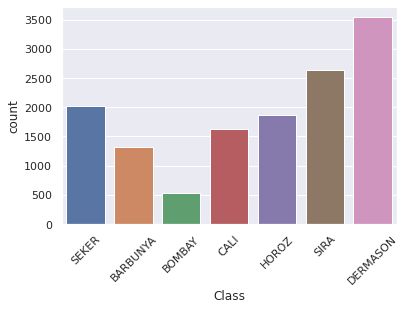

In [11]:
sns.countplot(x='Class', data=df)
plt.xticks(rotation=45)
plt.show()

El grafico nos muestra que hay mas ejemplo para la clase dermason y menos en la clase bombay. Esto afecta considerablemente el desempeño de la regresion logistica ya que aprendera a predecir mucho mejor valores de **dermason** que de **bombay**. Para datasets desbalanceados tenemos dos formas de resolver:

- Undersampling: Reducir los datos de todas las clases a la clase con minima cantidad de ejemplos, garantizando de esta forma que todos tengan la misma cantidad. La desventaja es que se pierde informacion valiosa que podria ser util.

- Crear ejemplos con la misma desviacion estandar o con la varianza o mismos parametros de cada clase para rellenar todas las clases hasta llegar a la misma cantidad de la clase con mayor ejemplos. La desventaja es que estamos creando ejemplos que no necesariamente son ciertos.

En este caso, vemos que hay mas de 500 registros de la clase minima por lo que es conveniente aplicar Undersampling.

In [13]:
# libreria para aplicar undersampling
from imblearn.under_sampling import RandomUnderSampler

# Creamos un objeto undersample 
undersample = RandomUnderSampler(random_state=42)

In [14]:
# dividimos el dataset en dos grupos
# datos sin la variable clase
X = df.drop('Class',axis=1)

# datos de la variable clase
y = df.Class

In [15]:
# pasamos ambos grupos al metodo fit_resample para ajustar la data
X_over , y_over = undersample.fit_resample(X,y)

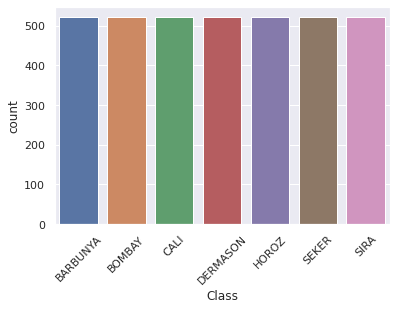

In [17]:
# Graficamos las clases contenidas en X_over
sns.countplot(x=y_over, data=X_over)
plt.xticks(rotation=45)
plt.show()

In [18]:
df.shape

(13543, 17)

In [19]:
X_over.shape

(3654, 16)

De esta manera hemos ajustado las demas variables a la variable con minima cantidad de datos.

## Conversión a numéricos

In [15]:
list(np.unique(y_over))

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [16]:
y_over.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'], [1,2,3,4,5,6,7], inplace=True)

In [17]:
list(np.unique(y_over))

[1, 2, 3, 4, 5, 6, 7]

## Análisis exploratorio de datos

### Corrrelations

In [18]:
df_dea = X_over
df_dea['Class'] = y_over

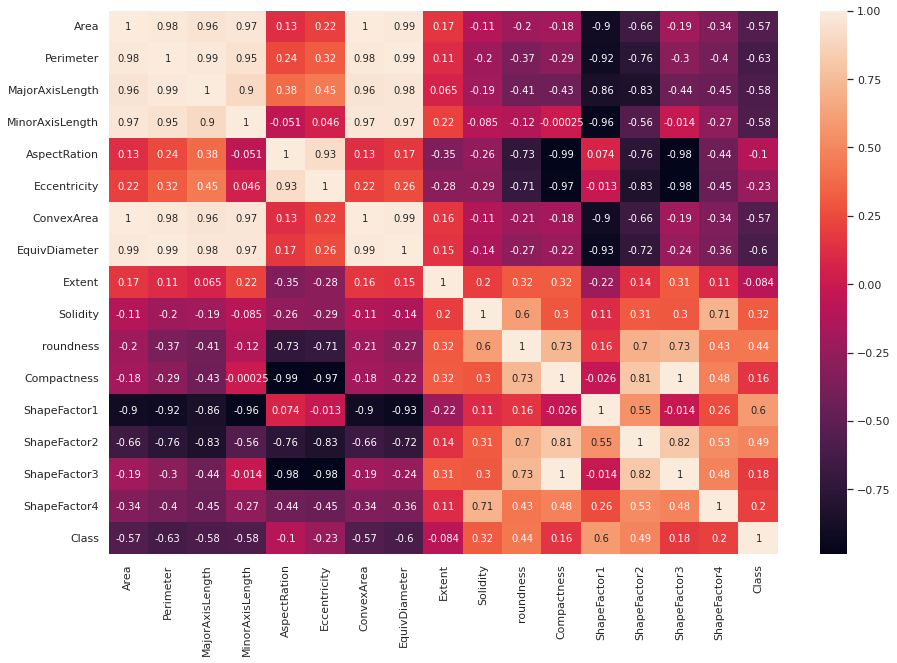

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df_dea.corr(), annot=True)
plt.show()

In [20]:
X_over.drop(['ConvexArea','EquivDiameter'], axis=1, inplace=True) 

## Visualización de datos

In [21]:
#sns.pairplot(df_dea, hue='Class')

## Split y escalamiento de datos

In [22]:
X_train, X_test, y_train , y_test = train_test_split(X_over, y_over, random_state=42, shuffle=True, test_size= .2)

In [23]:
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train) 
X_test = st_x.transform(X_test)

## Modelo multiclase

In [24]:
def logistic_model(C_,solver_ , multiclass_):
    logistic_regression_model = LogisticRegression(random_state=42, solver= solver_, multi_class= multiclass_, n_jobs=-1, C=C_ )
    return logistic_regression_model

In [25]:
model = logistic_model(1,'saga','multinomial')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[128   0   0   0   0   0   0]
 [  0  98   0   0   0   0   0]
 [  0   0 102   1   0   0   0]
 [  0   0   0 105   0   0   0]
 [  0   0   1   1  94   0   0]
 [  0   0   0   0   0  89   2]
 [  0   0   0   0   0   0 110]]
0.9931600547195623


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [26]:
multiclass = ['ovr','multinomial']
solver_list = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
scores = []
params=[]
for i in multiclass:
    for j in solver_list:
        try:
            model = logistic_model(1,j,i)
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            params.append(i + '-'+ j)
            accuraccy = accuracy_score(y_test,predictions)
            scores.append(accuraccy)
        except:
            None    

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/lin

## Evaluación de resultados

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

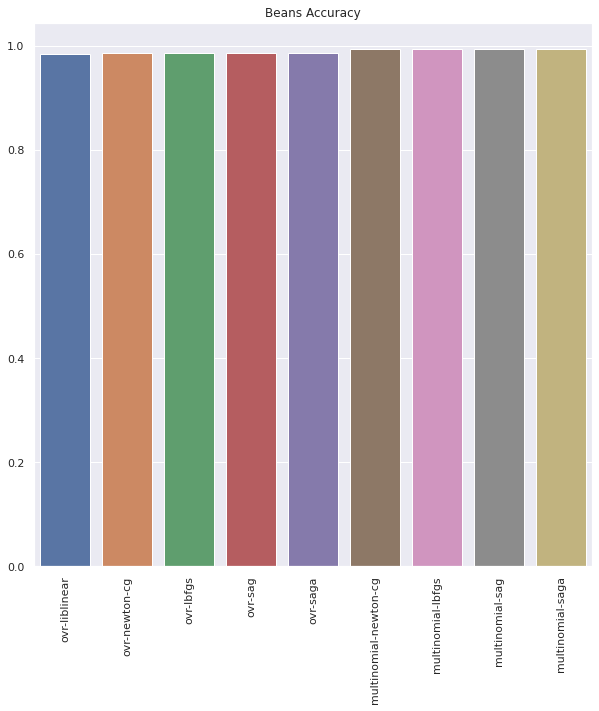

In [27]:
fig = plt.figure(figsize=(10,10))
sns.barplot(x=params, y=scores).set_title('Beans Accuracy')
plt.xticks(rotation=90)

In [29]:
model = logistic_model(1,'newton-cg','multinomial')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

[[128   0   0   0   0   0   0]
 [  0  98   0   0   0   0   0]
 [  0   0 102   1   0   0   0]
 [  0   0   0 105   0   0   0]
 [  0   0   1   1  94   0   0]
 [  0   0   0   0   0  90   1]
 [  0   0   0   0   0   0 110]]
0.9945280437756497


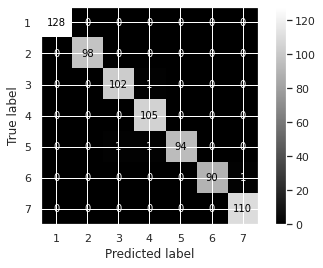

In [33]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_) 
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()